Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



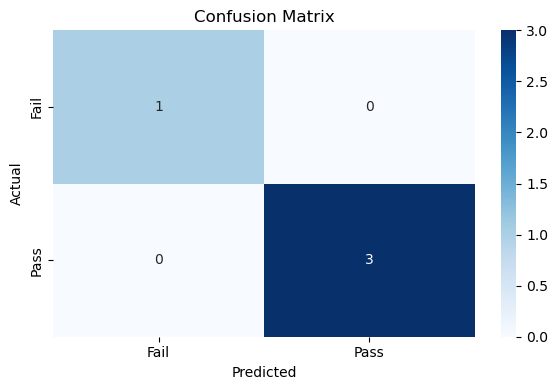

----------Predict Your Result-----------
Prediction Based on input: Fail


c:\Users\unnit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_data.csv")

# Encode categorical columns
le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df["Passed"])

# Features and scaling
features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Split data
X = df_scaled[features]
y = df_scaled['Passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Prediction for user input
print("----------Predict Your Result-----------")
try:
    study_hours = float(input("Enter study hours: "))
    attendance = float(input("Enter attendance: "))
    past_score = float(input("Enter past score: "))
    sleep_hours = float(input("Enter sleep hours: "))

    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance': attendance,
        'PastScore': past_score,
        'SleepHours': sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]

    result = "Pass" if prediction == 1 else "Fail"
    print(f"Prediction Based on input: {result}")

except Exception as e:
    print("Error!", e)
